<a href="https://colab.research.google.com/github/YasserJxxxx/MLP/blob/main/Seleccion_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- FASE 4: ENTRENAMIENTO DEL MLP ---
Épocas: 200, Tamaño del Lote: 4


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Iris_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)           │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)


--- FASE 5: EVALUACIÓN DEL MODELO CON GRÁFICOS ---


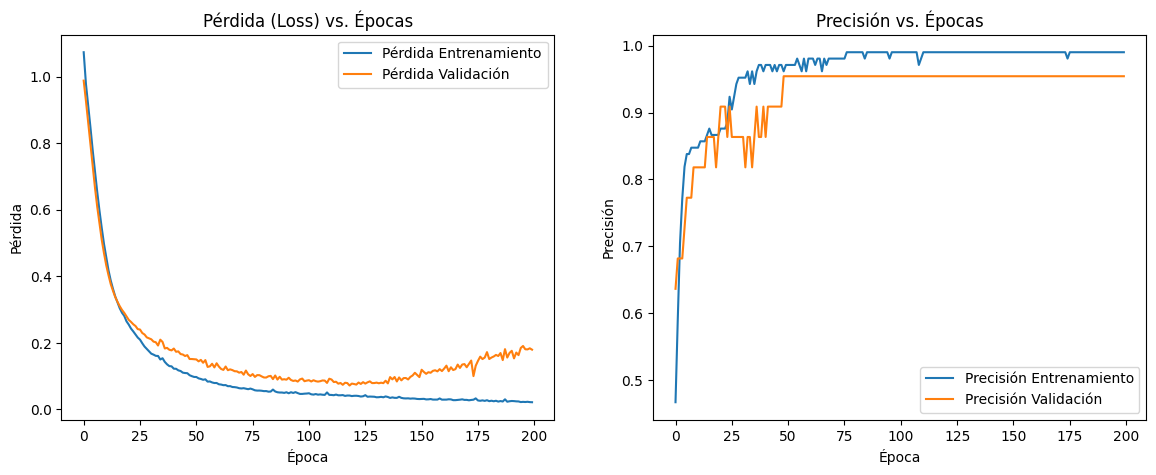

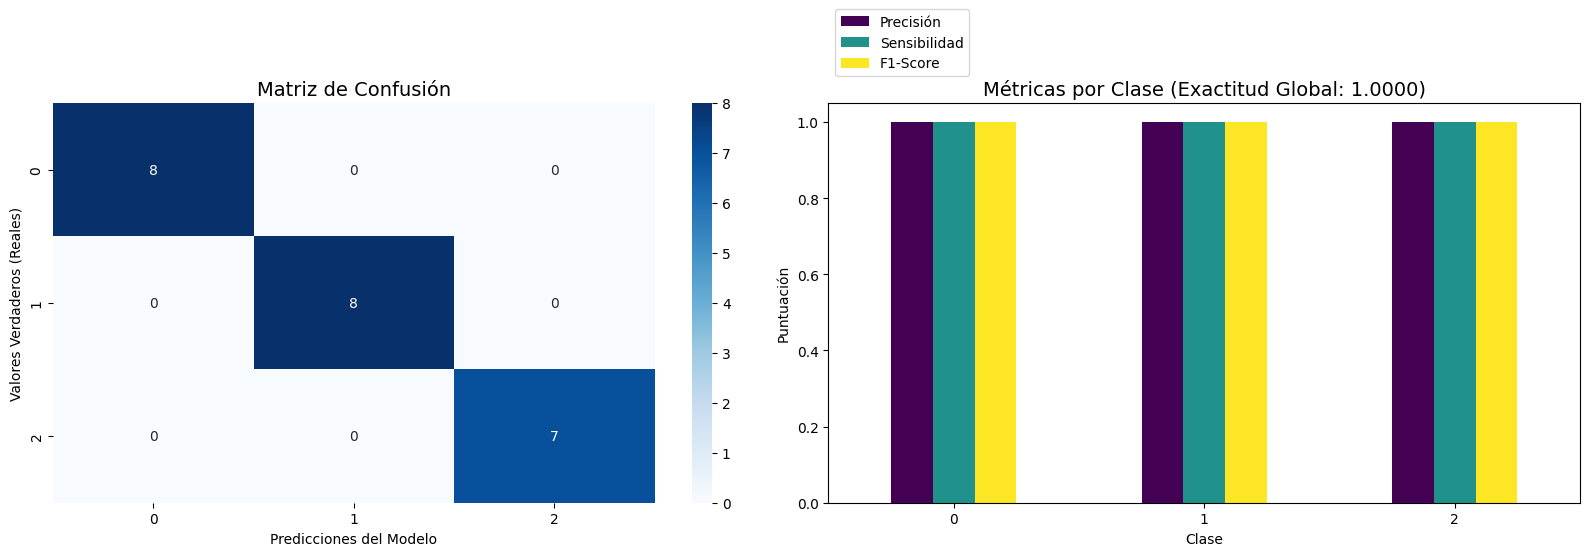


--- REPORTE DE CLASIFICACIÓN DETALLADO ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


--- FASE 6: DESPLIEGUE (MODELO INTERACTIVO) ---
[✅] Modelo y Escalador guardados para despliegue.

Ingrese las 4 medidas de la flor (en cm):


KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import joblib
import os # Para verificar si existen los archivos guardados

# ====================================================================
# CONFIGURACIÓN DE PARÁMETROS DEL MODELO (Ajustables)
# ====================================================================

MODEL_PARAMS = {
    'epochs': 200,
    'batch_size': 4,
    'hidden_layers': [16, 8]
}

# --- FASES 1-3: Carga y Preparación de Datos ---

# Carga y Preparación
iris = load_iris(as_frame=True)
df = iris.frame
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

X = df.drop('Species', axis=1)
y = df['Species'].astype(str)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
class_names = le.classes_.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42, stratify=y_categorical)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]


# ====================================================================
# FASE 4: MODELADO (FUNCIÓN CON PARÁMETROS AJUSTABLES)
# ====================================================================

def create_and_train_mlp(X_train, y_train, X_val, y_val, params):
    """Define y entrena el MLP."""
    print("--- FASE 4: ENTRENAMIENTO DEL MLP ---")

    model = Sequential(name="Iris_MLP")

    for i, units in enumerate(params['hidden_layers']):
        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],), name=f'Capa_Oculta_{i+1}'))
        else:
            model.add(Dense(units, activation='relu', name=f'Capa_Oculta_{i+1}'))

    model.add(Dense(y_train.shape[1], activation='softmax', name='Capa_Salida'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"Épocas: {params['epochs']}, Tamaño del Lote: {params['batch_size']}")
    model.summary()

    history = model.fit(
        X_train, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_val, y_val),
        verbose=0
    )
    return model, history

model, history = create_and_train_mlp(X_train, y_train, X_val, y_val, MODEL_PARAMS)

# ====================================================================
# FASE 5: EVALUACIÓN (PLOTS Y MÉTRICAS)
# ====================================================================

print("\n--- FASE 5: EVALUACIÓN DEL MODELO CON GRÁFICOS ---")

# --- A. Gráfico de Historial de Entrenamiento ---

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(history.history['loss'], label='Pérdida Entrenamiento')
    ax[0].plot(history.history['val_loss'], label='Pérdida Validación')
    ax[0].set_title('Pérdida (Loss) vs. Épocas')
    ax[0].set_xlabel('Época')
    ax[0].set_ylabel('Pérdida')
    ax[0].legend()

    ax[1].plot(history.history['accuracy'], label='Precisión Entrenamiento')
    ax[1].plot(history.history['val_accuracy'], label='Precisión Validación')
    ax[1].set_title('Precisión vs. Épocas')
    ax[1].set_xlabel('Época')
    ax[1].set_ylabel('Precisión')
    ax[1].legend()
    plt.show()

plot_training_history(history)


# --- B. Matriz de Confusión y Métricas Finales ---

y_pred_probs = model.predict(X_test, verbose=0)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names, output_dict=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# GRÁFICO 1: MATRIZ DE CONFUSIÓN
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Matriz de Confusión', fontsize=14)
axes[0].set_ylabel('Valores Verdaderos (Reales)')
axes[0].set_xlabel('Predicciones del Modelo')

# GRÁFICO 2: MÉTRICAS POR CLASE
metrics_df = pd.DataFrame({
    'Clase': class_names,
    'Precisión': [report[c]['precision'] for c in class_names],
    'Sensibilidad': [report[c]['recall'] for c in class_names],
    'F1-Score': [report[c]['f1-score'] for c in class_names]
}).set_index('Clase')

metrics_df.plot(kind='bar', ax=axes[1], cmap='viridis')
axes[1].set_title(f'Métricas por Clase (Exactitud Global: {accuracy:.4f})', fontsize=14)
axes[1].set_ylabel('Puntuación')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(loc='lower left', bbox_to_anchor=(0.0, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n--- REPORTE DE CLASIFICACIÓN DETALLADO ---")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))


# ====================================================================
# FASE 6: DESPLIEGUE (EXPORTACIÓN E INTERACCIÓN) 🚀
# ====================================================================

print("\n" + "="*50)
print("--- FASE 6: DESPLIEGUE (MODELO INTERACTIVO) ---")
print("="*50)

# Exportación del Modelo y componentes
model_filename = 'iris_mlp_model.h5'
scaler_filename = 'iris_scaler.pkl'
labels_filename = 'iris_labels.txt'

model.save(model_filename)
joblib.dump(scaler, scaler_filename)
print(f"[✅] Modelo y Escalador guardados para despliegue.")


# --- FUNCIÓN INTERACTIVA DE PREDICCIÓN ---

def predict_iris_species(model, scaler, class_names):
    """Permite al usuario ingresar parámetros y obtiene la predicción."""
    try:
        print("\nIngrese las 4 medidas de la flor (en cm):")

        sepal_length = float(input("1. Longitud del sépalo (SepalLengthCm): "))
        sepal_width = float(input("2. Ancho del sépalo (SepalWidthCm): "))
        petal_length = float(input("3. Longitud del pétalo (PetalLengthCm): "))
        petal_width = float(input("4. Ancho del pétalo (PetalWidthCm): "))

        # Crear un DataFrame para la muestra
        new_sample = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                                  columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

        # 1. Escalar la muestra (CRÍTICO)
        new_sample_scaled = scaler.transform(new_sample)

        # 2. Predecir
        predictions = model.predict(new_sample_scaled, verbose=0)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_species = class_names[predicted_class_index]
        confidence = predictions[0][predicted_class_index] * 100

        # 3. Mostrar Resultado
        print("-" * 40)
        print(f"Muestra: {new_sample.values[0]}")
        print(f"Probabilidades por clase: {predictions[0]}")
        print(f"\n[🌺 PREDICCIÓN FINAL: {predicted_species.upper()} ]")
        print(f"El modelo tiene una confianza del {confidence:.2f}% en esta clasificación.")
        print("-" * 40)

    except ValueError:
        print("[❌ ERROR] Asegúrese de ingresar solo números válidos.")
    except Exception as e:
        print(f"[❌ ERROR INESPERADO] Ocurrió un error durante la predicción: {e}")

# Llamar a la función interactiva
predict_iris_species(model, scaler, class_names)